# Hoja de Trabajo 3 - Clasificacion SVM

### Antes que nada se tenia que hacer la limpieza de datos

#### Importamos librerias

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'ydata_profiling'

### Leer los datos del archivo CSV

In [ ]:
df = pd.read_csv("wine_fraud.csv", header=None)

### Agregar nombres a las columnas

In [ ]:
column_names = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality",
    "type",
]
df.columns = column_names

### Muestra los primeros 5 registros

In [ ]:
print(df.head())

### Convertir la variable quality a numérica (0 para muestras Legit y 1 para muestras Fraud)

In [ ]:
df["quality"] = df["quality"].replace({"Legit": 0, "Fraud": 1})

### Convertir la variable quality a numerica

In [ ]:
df["quality"] = pd.to_numeric(df["quality"], errors="coerce")

### Convertir la variable type a numérica (0 para muestras de vino white y 1 para muestras de vino red)

In [ ]:
df["type"] = df["type"].replace({"white": 0, "red": 1})

### Convertir la variable type a numerica

In [ ]:
df["type"] = pd.to_numeric(df["type"], errors="coerce")

### Eliminar filas con valores faltantes

In [ ]:
df = df.dropna()

### Eliminar filas duplicadas

In [ ]:
df = df.drop_duplicates()

### Generar un informe detallado de los datos

In [ ]:
profile = ProfileReport(df, title="Wine dataset", explorative=True)

### Guardar el informe en un archivo HTML

In [ ]:
profile.to_file("Wine_Dataset.html")

### Guardar la data limpia en un nuevo archivo

In [ ]:
df.to_csv("wine_fraud_limpio.csv")

### Importar Librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

### Leer los datos del archivo CSV

In [ ]:
df = pd.read_csv("wine_fraud_limpio.csv", header=0)  # specify header=0
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### División del conjunto de datos en un conjunto para entrenamiento y otro para pruebas

In [ ]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(
    X, y, test_size=0.25, random_state=0
)

### Escalamiento o Normalización

In [ ]:
normalizador = StandardScaler()
X_entreno = normalizador.fit_transform(X_entreno)
X_prueba = normalizador.transform(X_prueba)

### Entrenar el moderlo Kernel SVM con el conjunto de datos para entrenamiento

In [ ]:
clasificador = SVC(kernel="rbf", random_state=0)
clasificador.fit(X_entreno, y_entreno)

SVC(random_state=0)

### Predicción de los valores del conjunto de datos para pruebas

In [ ]:
y_pred = clasificador.predict(X_prueba)

### print de las diferentes pruebas

In [ ]:
print(confusion_matrix(y_prueba, y_pred))
print(classification_report(y_prueba, y_pred))
print("Accuracy of the prediction: ", accuracy_score(y_prueba, y_pred))

[[992   0]
 [  5 333]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       992
           1       1.00      0.99      0.99       338

    accuracy                           1.00      1330
   macro avg       1.00      0.99      1.00      1330
weighted avg       1.00      1.00      1.00      1330

Accuracy of the prediction:  0.9962406015037594


### Visualize the data using a scatter plot

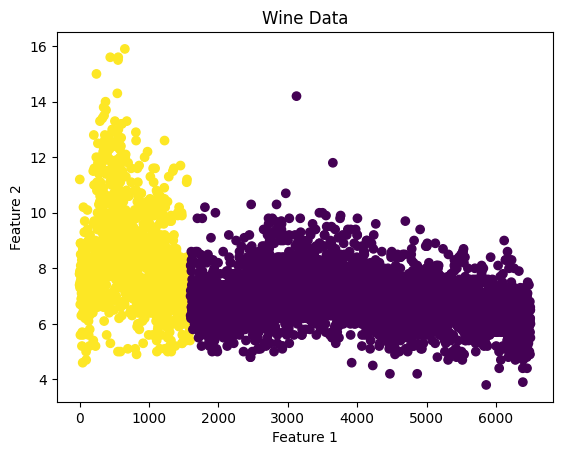

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Wine Data")
plt.show()

### Visualize the confusion matrix using a heatmap

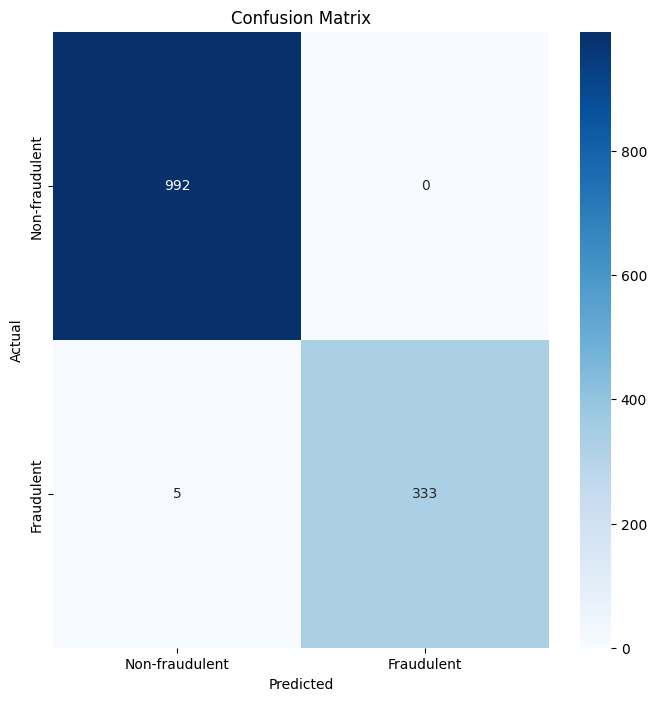

In [ ]:
conf_mat = confusion_matrix(y_prueba, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    conf_mat,
    annot=True,
    cmap="Blues",
    fmt="d",
    xticklabels=["Non-fraudulent", "Fraudulent"],
    yticklabels=["Non-fraudulent", "Fraudulent"],
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

Conclusión:

A partir de los hallazgos encontrados del modelo de clasificación la compañia distribuidora los podría utilizar para detectar vinos de baja calidad y reducir el riego de fraude. Además, la compañia podria considerar implementar medidas adicionales de seguridad, como una verificación más exhaustiva de los proveedores y la realización de pruebas químicas adicionales para confirmar la calidad de los vinos.